# Zustandsänderungen des idealen Gases

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/sgeorg%2Fpython-thermo/HEAD?filepath=Zustands%C3%A4nderungen.ipynb)

Im folgenden sind die Zustandsänderungen

* Isobar
* Isochor
* Isotherm
* Isentrop

eines idealen Gases im p-v- und T-s-Diagramm dargestellt. Das Gas sei zweiatomig mit einem Isentropenexponent $\kappa = 1,4$ und einer spezifischen Gaskonstante $R_i = 287 \frac{J}{kg \cdot K}$.

Die Zustandänderungen werden jeweils in einem p-v-Diagramm und einem T-s-Diagramm dargestellt. Zusätzlich zu den Vorgegebenen Zustandsänderungen kann eine Polytrope mit einstellbarem Polytropenexponent *n* angezeigt werden.

**Beim erstmaligen starten bitte im Menü auf *Kernel->Restart & Run All* gehen.**

## Setup

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plot
import ipywidgets

# Eigenschaften des Fluids
κ = n = 1.4
Ri = 287.0
cp = κ / (κ - 1) * Ri
cv = cp - Ri

# Zustand des Ausgangspunktes
p0 = 1e5    # 1 bar
T0 = 293.15 # 20 °C
v0 = (Ri * T0) / p0

## p-v-Diagramm

<IPython.core.display.Javascript object>


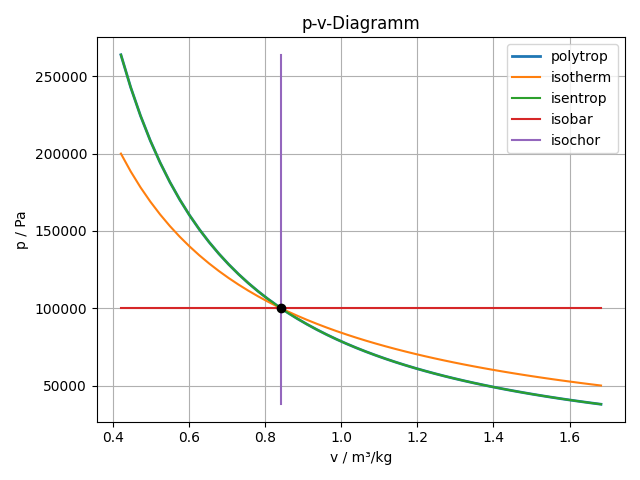

interactive(children=(FloatLogSlider(value=1.4, description='n', max=2.0, min=-2.0), Output()), _dom_classes=(…

In [2]:
# Hilfsfunktion
def p(v, n): return (Ri * T0) / (v0 * (v / v0) ** n)

# Achsendefinition
vv = np.linspace(v0 / 2, 2 * v0)

# p-v-Diagramm
pv, ax = plot.subplots()
polytropic_pv, = ax.plot(vv, p(vv, n), label='polytrop', linewidth=2)
ax.plot(vv, p(vv, 1), label='isotherm')
ax.plot(vv, p(vv, κ), label='isentrop')
ax.plot(vv, p(vv, 0), label='isobar')
ax.plot(np.full(vv.shape, v0), p(vv, κ), label='isochor') # Isentrope Formel für p
ax.plot((Ri * T0) / p0, p0, 'ko')
ax.set_title('p-v-Diagramm')
ax.set_xlabel('v / m³/kg')
ax.set_ylabel('p / Pa')
ax.legend()
ax.grid()
pv.tight_layout()

# Interaktiver Regler für Polytropenexponent 'n'
@ipywidgets.interact
def polytropic_slider_pv(n=ipywidgets.FloatLogSlider(n, min=-2, max=2)):
    polytropic_pv.set_ydata(p(vv, n))
    pv.show()

## T-s-Diagramm

<IPython.core.display.Javascript object>


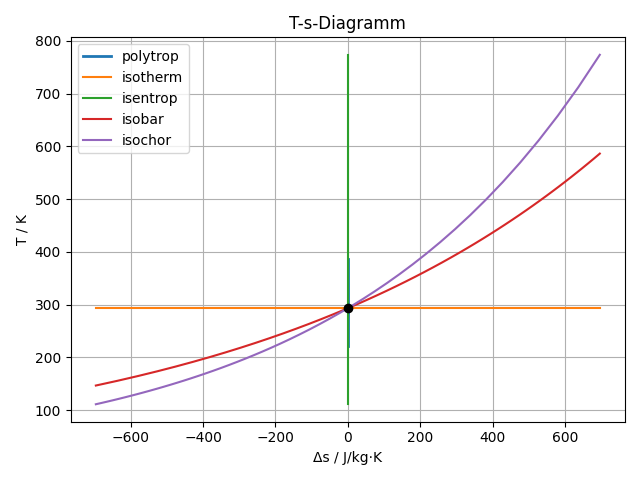

interactive(children=(FloatLogSlider(value=1.4, description='n', max=1.0, min=-2.0, step=0.025), Output()), _d…

In [3]:
# Hilfsfunktionen
def T_poly(v, n): return T0 * (v0 / v) ** (n - 1)
def s_poly(v, n): return cv * (n - κ) / (n - 1) * np.log(T_poly(v, n) / T0)

# T-s-Diagramm
Ts, ax = plot.subplots()
polytropic_Ts, = ax.plot(s_poly(vv, n), T_poly(vv, n), label='polytrop', linewidth=2)
ax.plot(cp * np.log(vv / v0), np.full(vv.shape, T0), label='isotherm') # Isobare Formel für Δs
ax.plot(np.full(vv.shape, 0), T0 * p(vv, κ) / p0, label='isentrop') # Isochore Formel für T
ax.plot(cp * np.log(vv / v0), T0 * vv / v0, label='isobar')
ax.plot(cv * np.log(p(vv, κ) / p0), T0 * p(vv, κ) / p0, label='isochor')
ax.plot(0, T0, 'ko')
ax.set_title('T-s-Diagramm')
ax.set_xlabel('Δs / J/kg·K')
ax.set_ylabel('T / K')
ax.legend()
ax.grid()
Ts.tight_layout()

# Interaktiver Regler für Polytropenexponent 'n'
@ipywidgets.interact
def polytropic_slider_Ts(n=ipywidgets.FloatLogSlider(n, min=-2, max=1, step=0.025)):
    polytropic_Ts.set_xdata(s_poly(vv, n))
    polytropic_Ts.set_ydata(T_poly(vv, n))
    pv.show()